### Data Exploration and Analysis Notebook

In [139]:
# Import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt
from IPython.display import display, HTML

graph_directory = "..\\graphs\\"

In [ ]:
# Import dataset and print out basic data

df = pd.read_csv("..\\data\\unclean\\car_dataset.csv", delimiter = ";")

print(df.describe(include='all'))
print(f"\nTotal Rows: {len(df)}")
print(f"\n{df.head(7)}")

       buying maintenance doors persons luggage_boot safety class_values
count    1728        1728  1728    1728         1728   1728         1728
unique      4           4     4       3            3      3            4
top     vhigh       vhigh     2       2        small    low        unacc
freq      432         432   432     576          576    576         1210

Total Rows: 1728

  buying maintenance doors persons luggage_boot safety class_values
0  vhigh       vhigh     2       2        small    low        unacc
1  vhigh       vhigh     2       2        small    med        unacc
2  vhigh       vhigh     2       2        small   high        unacc
3  vhigh       vhigh     2       2          med    low        unacc
4  vhigh       vhigh     2       2          med    med        unacc
5  vhigh       vhigh     2       2          med   high        unacc
6  vhigh       vhigh     2       2          big    low        unacc


In [116]:
# Missing values
print("\nNumber of missing values in dataset:")
print(df.isnull().sum())

# Unique values in categorical columns
print("\nUnique values for distinct column:")
for col in ['buying', 'maintenance', 'doors', 'persons', 'luggage_boot', 'safety', 'class_values']:
    print(f"{col} : {df[col].unique()}")


Number of missing values in dataset:
buying          0
maintenance     0
doors           0
persons         0
luggage_boot    0
safety          0
class_values    0
dtype: int64

Unique values for distinct column:
buying : ['vhigh' 'high' 'med' 'low']
maintenance : ['vhigh' 'high' 'med' 'low']
doors : ['2' '3' '4' '5more']
persons : ['2' '4' 'more']
luggage_boot : ['small' 'med' 'big']
safety : ['low' 'med' 'high']
class_values : ['unacc' 'acc' 'vgood' 'good']


In [ ]:
# Print value counts for all columns

output = "<table><tr>"

for column in df.columns:
    output += f"<th>{column}</th>"
output += "</tr><tr>"

for column in df.columns:
    value_counts = df[column].value_counts().to_frame()
    value_counts_html = value_counts.to_html(header=False, border=1, justify="left", max_rows=None)
    output += f"<td>{value_counts_html}</td>"
output += "</tr></table>"

HTML(output)


# Display full value counts for all columns
# for column in df.columns:
#     display(df[column].value_counts())

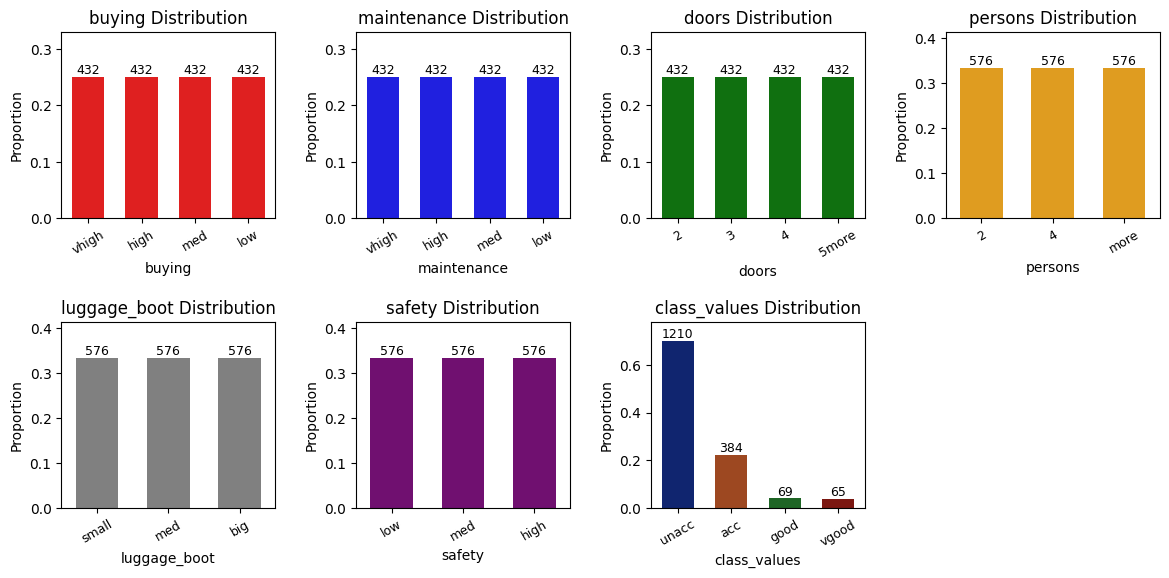

In [ ]:
# Values distribution graph

colors_array = [
    "red", "blue", "green", "orange", "grey", "purple"
]

categorical_columns = df.columns.tolist()
n_cols = 4
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 2 + 2))

for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    value_counts = df[col].value_counts(normalize=True)
    counts = df[col].value_counts()
    
    color_choice = colors_array[i % len(colors_array)]

    sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        palette="dark" if i == 6 else None,
        color=color_choice if i != 6 else None,
        hue=value_counts.index if i == 6 else None,
        dodge=False,
        legend=False,
        width=0.6,
    )
    
    for j, count in enumerate(counts):
        plt.text(j, value_counts.values[j], f'{count}', ha='center', va='bottom', fontsize=9)

    max_y = value_counts.max()
    plt.ylim(0, max_y + 0.08)
    
    plt.title(f'{col} Distribution', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Proportion', fontsize=10)
    plt.xticks(rotation=30, fontsize=9)

plt.tight_layout(pad=1.5)
output = "value_distribution_graph.png"
plt.savefig(graph_directory + output)
plt.show()